In [1]:
import Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
Precompiling project...
┌ Warning: attempting to remove probably stale pidfile
│   path = /home/erlo/.julia/compiled/v1.10/Unitful/5WYj5_Oq6Du.ji.pidfile
└ @ FileWatching.Pidfile /home/erlo/.julia/juliaup/julia-1.10.3+0.x64.linux.gnu/share/julia/stdlib/v1.10/FileWatching/src/pidfile.jl:244
┌ Warning: attempting to remove probably stale pidfile
│   path = /home/erlo/.julia/compiled/v1.10/OpenSSL/B4VRP_Oq6Du.ji.pidfile
└ @ FileWatching.Pidfile /home/erlo/.julia/juliaup/julia-1.10.3+0.x64.linux.gnu/share/julia/stdlib/v1.10/FileWatching/src/pidfile.jl:244
┌ Warning: attempting to remove probably stale pidfile
│   path = /home/erlo/.julia/compiled/v1.10/Qt6Declarative_jll/rB4FL_Oq6Du.ji.pidfile
└ @ FileWatching.Pidfile /home/erlo/.julia/juliaup/julia-1.10.3+0.x64.linux.gnu/share/julia/stdlib/v1.10/FileWatching/src/pidfile.jl:244
  ✓ Qt6Decla

In [2]:
using LinearAlgebra
using Plots
using ForwardDiff

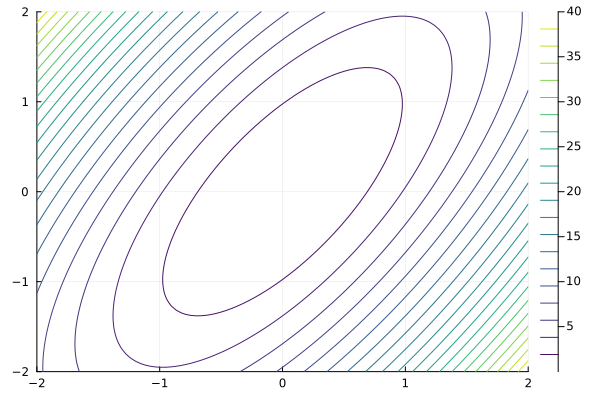

In [3]:
gr(size=(600,400))

xg = range(-2, 2, length=100)
yg = range(-2, 2, length=100)
f(x) = 4*x[1]^2 - 4*x[1]*x[2] + 2*x[2]^2

#surface(xg, yg, (x, y) -> f([x, y]), c=:viridis)
contour(xg, yg, (x, y) -> f([x, y]), levels=20, c=:viridis)

In [4]:
function gradiente(f, x)
    gradf(x) = ForwardDiff.gradient(f, x)
    eta = 1e-2
    num_backtracking = 0
    iter = 0
    while norm(gradf(x)) > 1e-4
        d = -gradf(x)
        # Busca de Armijo
        t =1.0
        while f(x + t * d) > f(x) + eta * t * dot(d, gradf(x))
            t = t / 2
            num_backtracking = num_backtracking + 1
            if t < 1e-10
                error("Erro no Backtracking")
            end
        end
        x = x + t * d
        iter += 1
        if iter > 1000
            erro("N~ao Converge")
        end
    end
    return x, iter, num_backtracking
end

gradiente (generic function with 1 method)

In [5]:
gradiente(f, [2.0, 3.0])

([1.52587890625e-5, 3.0517578125e-5], 31, 77)

In [6]:
function gradiente_plot(p, f, x)
    gradf(x) = ForwardDiff.gradient(f, x)
    eta = 1e-2
    num_backtracking = 0
    scatter!(p, [x[1]], [x[2]], c=:blue, ms=3)
    iter = 0
    while norm(gradf(x)) > 1e-4
        d = -gradf(x)
        t =1.0
        while f(x + t * d) > f(x) + eta * t * dot(d, gradf(x))
            t = t / 2
            num_backtracking = num_backtracking + 1
            if t < 1e-10
                error("Erro no Backtracking")
            end
        end
        xt= x + t * d
        plot!(p, [x[1], xt[1]], [x[2], xt[2]], c=:blue, l=:arrow)
        x=xt
        scatter!(p, [x[1]], [x[2]], c=:blue, ms=3)
        iter += 1
        if iter > 1000
            error("N~ao Converge")
        end
    end
    return x, iter, num_backtracking
end

gradiente_plot (generic function with 1 method)

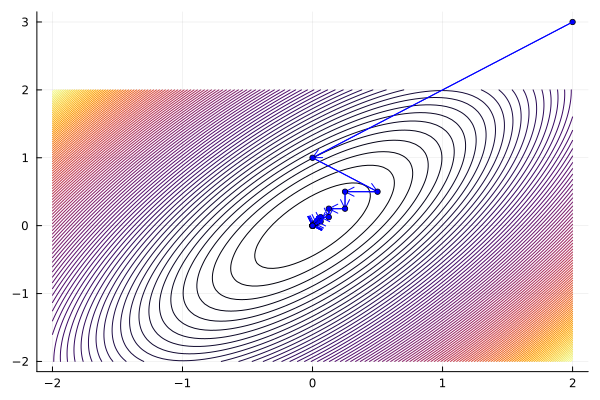

In [9]:
p = plot(leg=false)
contour!(p,xg, yg, (x,y) -> f([x;y]), levels=100)
x, iter, nbk = gradiente_plot(p, f, [2.0; 3.0])
p